1. Red Neuronal Feed Forward en PyTorch

    * Resolver el ejercicio 2 de la Clase 2 utilizando una red neuronal feed forward en PyTorch. Pueden usar los notebooks de la clase de referencia.

In [7]:
import numpy as np
import torch 
import torch.nn as nn
from torch import sigmoid
import matplotlib.pylab as plt
import numpy as np
torch.manual_seed(0)
from torch.utils.data import Dataset, DataLoader
import torchsummary
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()

In [19]:
#generador de datos
class Data(Dataset):
    
    def __init__(self, n=10000):
        x = np.random.uniform(0,4,n)
        y = -(x-2)**2 + 3*0.05*np.random.randn(x.shape[0]) + .2*np.sin(16*x)
        self.y = torch.from_numpy(y).type(torch.Tensor)
        self.x = torch.from_numpy(x).type(torch.FloatTensor)
        self.len = y.shape[0]
    
    # Getter
    def __getitem__(self, index):    
        return self.x[index], self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len

In [25]:
class modelo(nn.Module):
    def __init__(self):
        super().__init__() 
        
        self.linear1 = nn.Linear(1, 8)
        self.activation1 = nn.ReLU()
        self.linear2 = nn.Linear(8, 16)
        self.activation2 = nn.Softmax()
        self.linear_out = nn.Linear(16, 1)
        
    def forward(self, input):
        out1 = self.activation1(self.linear1(input))
        out2 = self.activation2(self.linear2(out1))
        output = self.linear_out(out2)
        
        return output
    
modelo= modelo()
torchsummary.summary(modelo, input_size=(10000, 1))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1             [-1, 10000, 8]              16
              ReLU-2             [-1, 10000, 8]               0
            Linear-3            [-1, 10000, 16]             144
           Softmax-4            [-1, 10000, 16]               0
            Linear-5             [-1, 10000, 1]              17
Total params: 177
Trainable params: 177
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.04
Forward/backward pass size (MB): 3.74
Params size (MB): 0.00
Estimated Total Size (MB): 3.78
----------------------------------------------------------------


<ipython-input-25-fcc1d824af40>:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out2 = self.activation2(self.linear2(out1))


In [26]:
def train(dataset,model,criterion, train_loader, optimizer, epochs=5):
    cost=[]
    
    for epoch in range(epochs):
        total=0
        
        for x,y in train_loader:
            
            optimizer.zero_grad()
            
            yhat=model(x)
            loss=criterion(yhat,y)
            loss.backward()
            optimizer.step()
            total+=loss.item()
        
        cost.append(total)
    plt.figure()
    plt.plot(cost)
    plt.xlabel('epoch')
    plt.ylabel('cost')
    plt.show()
    return cost

In [27]:
data_set = Data()
data_set.y = data_set.y.view(-1,1)
data_set.x = data_set.x.view(-1,1)

<ipython-input-25-fcc1d824af40>:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out2 = self.activation2(self.linear2(out1))


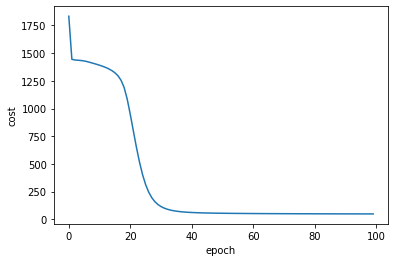

In [28]:
optimizer = torch.optim.SGD(modelo.parameters(), lr=0.001)
train_loader = DataLoader(dataset=data_set, batch_size=10)
criterion = nn.MSELoss()
LOSS = train(data_set,modelo,criterion, train_loader, optimizer, epochs=100)



<ipython-input-25-fcc1d824af40>:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  out2 = self.activation2(self.linear2(out1))


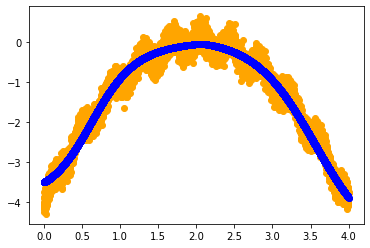

In [29]:
yhat = modelo(data_set.x)

plt.scatter(data_set.x,data_set.y,color="orange",label="original")
plt.scatter(data_set.x,yhat.detach().numpy(),color="blue",label="predicción")

